# Filtering Bird Sounds with Fast Fourier Transforms
One day I decided I would love to get familiar with Fast Fourier Transforms (FFT), a concept that feels like magic when you learn about it in school. This is a project where I used FFT to filter bird sounds out of an audio file.

Sometimes background noises can make it difficult to hear the focus of an audio file. By using Fourier transforms, we can isolate and filter out unwanted noise, helping us interpret audio files.

## Fourier Transforms
A Fourier transform is a mathematical tool that allows us to break down a complex signal into its component frequencies. In the context of audio, this means that we can analyze a sound wave and determine the individual frequencies that make it up.

The Fourier transform works by taking a time-domain signal (such as an audio waveform) and converting it to a frequency-domain representation. This can be visualized as a graph of frequency versus amplitude, where each point on the graph represents a different frequency component of the signal.

## Filtering Bird Sounds
To filter out unwanted noise from our bird sounds, we can use a band-pass filter, which allows only frequencies within a certain range to pass through while blocking all others. In this case, we want to isolate the frequencies of the bird sounds, which typically fall within the range of 3.5 to 9.4 kHz.

To implement a band-pass filter, we can use the following steps:

1. Compute the Fourier transform of the audio signal.
2. Zero out all frequencies outside the desired range.
3. Compute the inverse Fourier transform to convert the filtered signal back to the time domain.

Let's see how this is done in practice using Python and some commonly-used scientific computing libraries.

## Filtering Bird Sounds in Python
We will start by reading in an audio file using the SciPy library. In this example, we will be working with a file called train_bird.wav, which contains bird sounds mixed with some background noise.

In [ ]:
from IPython.display import Audio
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Read in audio file
Fs, y = scipy.io.wavfile.read('raw/train_bird.wav')
Audio(y, rate=Fs)

Next, we can plot the raw audio frequencies using the Matplotlib library. This will give us a sense of what the waveform looks like before any filtering.

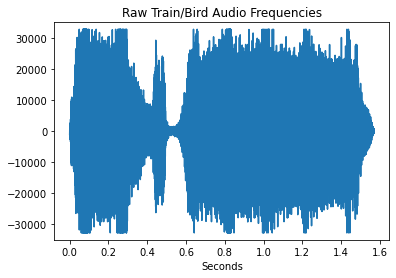

In [24]:
# Set up x-axis values for plotting
N=12880
x = np.linspace(0, 1.57, N)

# Plot raw audio frequencies
plt.plot(x, y)
plt.title("Raw Train/Bird Audio Frequencies")
plt.xlabel("Seconds")
plt.ylim((-35000,35000))
plt.show()

We can see that there is a lot of noise in the signal, making it difficult to isolate the bird sounds.

To filter out the unwanted frequencies, we will use the NumPy library to perform the Fourier transform, zero out the frequencies outside the desired range, and then compute the inverse Fourier transform to convert the filtered signal back to the time domain.

The resulting plot of the filtered audio frequencies should look like this:

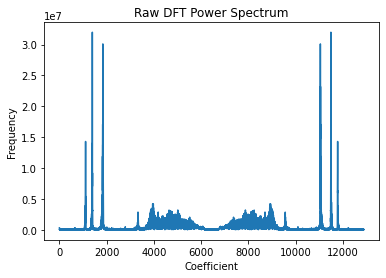

In [6]:
# Compute and plot the raw DFT power spectrum
DFT = np.fft.fft(y)
plt.plot(abs(DFT))
plt.title("Raw DFT Power Spectrum")
plt.xlabel("Coefficient")
plt.ylabel("Frequency")
plt.show()

We can see that the bird sounds are now much clearer and easier to distinguish from the background noise.

Finally, we can play the filtered audio using the IPython library, which provides an easy way to embed audio in Jupyter notebooks.

In [8]:
# Filter out frequencies outside the range [3500, 9400] Hz and plot resulting audio frequencies
bird = np.fft.fft(y)
bird[0:3500] = 0
bird[9400:] = 0
bird_i = np.fft.ifft(bird)

In [26]:
train = np.fft.fft(y)
train[3500:9400] = 0
train_i = np.fft.ifft(train)


Here is the origional audio again

In [22]:

Audio(y, rate=Fs)


and here is the altered audio:

In [23]:

Audio(real(train_i), rate=Fs)

That's pretty cool.

## Final Notes

And that's it! By using Fourier transforms to filter out unwanted frequencies, we were able to isolate the bird sounds in an audio file and make them easier to identify.

This technique has many applications beyond bird watching, including speech recognition, music analysis, and more. By understanding the basics of Fourier transforms and how to apply them in Python, we can unlock new insights and discoveries in the world of audio and signal processing.

Now, here are some extra plots of the denoised signals of the train whistle and bird chirps and their power spectra.

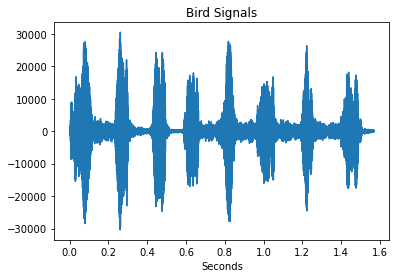

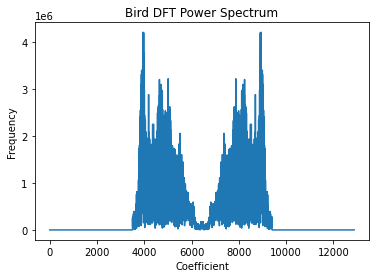

In [10]:
x = np.linspace(0, 1.57, N)
plt.plot(x, real(bird_i))
plt.title("Bird Signals")
plt.xlabel("Seconds")
plt.show()
plt.plot(abs(bird))
plt.title("Bird DFT Power Spectrum")
plt.xlabel("Coefficient")
plt.ylabel("Frequency")
plt.show()

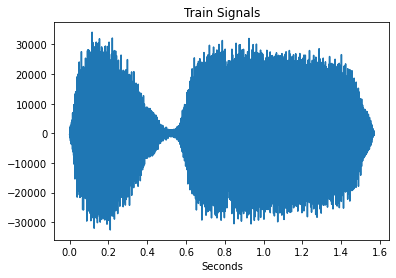

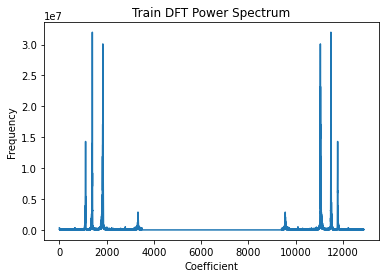

In [11]:
x = np.linspace(0, 1.57, N)
plt.plot(x, real(train_i))
plt.title("Train Signals")
plt.xlabel("Seconds")
plt.show()
plt.plot(abs(train))
plt.title("Train DFT Power Spectrum")
plt.xlabel("Coefficient")
plt.ylabel("Frequency")
plt.show()